In [1]:
%load_ext autoreload

%autoreload 2

In [3]:
import sys

sys.path.append('..')

In [9]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [1]:
from sklearn import datasets
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split

In [4]:
from vantgrd.logistic import LogisticRegressionFTRL, \
    LogisticRegressionWithAdagrad, LogisticRegressionWithAdadelta
from vantgrd.fm import FMWithAdagrad, FMWithSGD

In [5]:
epochs = 1

X, y = datasets.make_classification(n_samples=200000, n_features=25,
                                    n_informative=7, n_redundant=5, n_repeated=3,
                                    random_state=42, weights=[0.92, 0.08])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

models = [
    LogisticRegressionWithAdagrad(eta=.01, epochs=epochs, rate=1000),
    LogisticRegressionWithAdadelta(epochs=epochs, rate=1000),
    LogisticRegressionFTRL(epochs=epochs, rate=1000),
    FMWithAdagrad(eta=0.01, reg0=.01, regw=.01, regv=.01, rate=1000, epochs=epochs, n_factors=5),
    FMWithSGD(eta=0.01, reg0=.01, regw=.01, regv=.01, rate=1000, epochs=epochs, n_factors=5)
]

In [6]:
colors = {0: 'blue', 1: 'red', 2: 'black', 3: 'green', 4: 'yellow'}
labels = {0: 'lr-adagrad', 1: 'lr-adadelta', 2: 'lr-ftrl', 3: 'fm-adagrad', 4: 'fm-sgd'}

Epoch:   0 | Training Samples:      1000 | Loss:      470.72 | LossAdj:  0.47072 | Time taken:    0 seconds
Epoch:   0 | Training Samples:      2000 | Loss:      887.01 | LossAdj:  0.44350 | Time taken:    0 seconds
Epoch:   0 | Training Samples:      3000 | Loss:     1279.41 | LossAdj:  0.42647 | Time taken:    0 seconds
Epoch:   0 | Training Samples:      4000 | Loss:     1665.92 | LossAdj:  0.41648 | Time taken:    0 seconds
Epoch:   0 | Training Samples:      5000 | Loss:     2025.61 | LossAdj:  0.40512 | Time taken:    1 seconds
Epoch:   0 | Training Samples:      6000 | Loss:     2388.46 | LossAdj:  0.39808 | Time taken:    1 seconds
Epoch:   0 | Training Samples:      7000 | Loss:     2756.16 | LossAdj:  0.39374 | Time taken:    1 seconds
Epoch:   0 | Training Samples:      8000 | Loss:     3101.86 | LossAdj:  0.38773 | Time taken:    1 seconds
Epoch:   0 | Training Samples:      9000 | Loss:     3483.62 | LossAdj:  0.38707 | Time taken:    1 seconds
Epoch:   0 | Training Sample

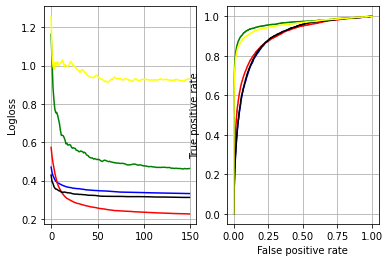

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
ax.grid()
ax.set_ylabel("Logloss")

bx = fig.add_subplot(1, 2, 2)
bx.grid()
bx.set_xlabel("False positive rate")
bx.set_ylabel("True positive rate")

for idx, lr in enumerate(models):
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)
    print(classification_report(y_test, y_pred))

    ax.plot(lr.train_tracker_.loss_, color=colors[idx], label=labels[idx])

    y_test_prob = lr.raw_predict(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
    roc_auc = auc(fpr, tpr)

    print("AUC = %f" % roc_auc)

    bx.plot(fpr, tpr, color=colors[idx], label='{0} ROC area = {1:.2f}'.format(labels[idx], roc_auc))

plt.show()